In [2]:
with open("searchResults12.txt", 'r') as f:
    data = f.readlines()

In [3]:
results = []
for line in data:
    if True: #'Solving' in line or 'Time elapsed in seconds' in line:
        results.append(line.split(','))

In [4]:
print (len(data))
print (results)

985
[['\n'], ['Solving Air Cargo Problem 1 using breadth_first_search...\n'], ['\n'], ['# Actions   Expansions   Goal Tests   New Nodes\n'], ['    20          43          56         178    \n'], ['\n'], ['Plan length: 6  Time elapsed in seconds: 0.006330558000627207\n'], ['Load(C1', ' P1', ' SFO)\n'], ['Load(C2', ' P2', ' JFK)\n'], ['Fly(P2', ' JFK', ' SFO)\n'], ['Unload(C2', ' P2', ' SFO)\n'], ['Fly(P1', ' SFO', ' JFK)\n'], ['Unload(C1', ' P1', ' JFK)\n'], ['\n'], ['\n'], ['Solving Air Cargo Problem 1 using depth_first_graph_search...\n'], ['\n'], ['# Actions   Expansions   Goal Tests   New Nodes\n'], ['    20          21          22          84    \n'], ['\n'], ['Plan length: 20  Time elapsed in seconds: 0.0035691409993887646\n'], ['Fly(P1', ' SFO', ' JFK)\n'], ['Fly(P2', ' JFK', ' SFO)\n'], ['Load(C2', ' P1', ' JFK)\n'], ['Fly(P1', ' JFK', ' SFO)\n'], ['Fly(P2', ' SFO', ' JFK)\n'], ['Unload(C2', ' P1', ' SFO)\n'], ['Fly(P1', ' SFO', ' JFK)\n'], ['Fly(P2', ' JFK', ' SFO)\n'], ['Load(

In [5]:
import pandas as pd

In [38]:
def result2df(results):    
    resultsdict = {}
    problem = []
    algorithm = []
    planlength = []
    time =[]
    actions =[]
    expansions =[]
    goaltests = []
    newnodes = []

    df = pd.DataFrame
    for i, item in enumerate(results):
        if 'Solving' in item[0]:        
            txt = item[0][18:].replace('\n', '')
            txt = txt.replace(' using', ',')
            problem.append(txt.split(',')[0]) 
            algorithm.append(txt.split(',')[1].replace('...', ''))
        elif 'Plan length' in item[0]:
            parms = item[0].split(':')
            planlength.append(parms[1].split()[0])
            time.append(float(parms[2].split('\n')[0]))      
        elif '    ' in item[0]:
            parms = item[0].split()
            actions.append(int(parms[0]))
            expansions.append(int(parms[1]))
            goaltests.append(int(parms[2]))     
            newnodes.append(int(parms[3]))        
        else:
            continue

    datadict = {'Problem': problem, 'Algorithm': algorithm, 'Plan length': planlength, 'Time elapsed in seconds': time, 
                '# Actions': actions, 'Expansions': expansions, 'Goal Tests': goaltests, 'New Nodes': newnodes}
    df = pd.DataFrame.from_dict(datadict)
    df.loc[:,"Expansions": "Plan length"] = df.loc[:, "Expansions": "Plan length"].apply(pd.to_numeric)
    return df

In [39]:
df = result2df(results)
df.head()

,# Actions,Algorithm,Expansions,Goal Tests,New Nodes,Plan length,Problem,Time elapsed in seconds
0,20,breadth_first_search,43,56,178,6,Problem 1,0.006331
1,20,depth_first_graph_search,21,22,84,20,Problem 1,0.003569
2,20,uniform_cost_search,60,62,240,6,Problem 1,0.010035
3,20,greedy_best_first_graph_search with h_unmet_g...,7,9,29,6,Problem 1,0.001615
4,20,greedy_best_first_graph_search with h_pg_leve...,56,58,224,9,Problem 1,0.029707


In [40]:
df.style.set_properties(subset=['Algorithm'], **{'width': '300px'})

,# Actions,Algorithm,Expansions,Goal Tests,New Nodes,Plan length,Problem,Time elapsed in seconds
0,20,breadth_first_search,43,56,178,6,Problem 1,0.00633056
1,20,depth_first_graph_search,21,22,84,20,Problem 1,0.00356914
2,20,uniform_cost_search,60,62,240,6,Problem 1,0.0100346
3,20,greedy_best_first_graph_search with h_unmet_goals,7,9,29,6,Problem 1,0.0016154
4,20,greedy_best_first_graph_search with h_pg_levelsum,56,58,224,9,Problem 1,0.0297073
5,20,greedy_best_first_graph_search with h_pg_maxlevel,60,62,240,9,Problem 1,0.0311287
6,20,greedy_best_first_graph_search with h_pg_setlevel,6,8,28,6,Problem 1,0.667264
7,20,astar_search with h_unmet_goals,50,52,206,6,Problem 1,0.00969755
8,20,astar_search with h_pg_levelsum,60,62,240,6,Problem 1,0.0312676
9,20,astar_search with h_pg_maxlevel,60,62,240,6,Problem 1,0.0298494


In [41]:
p1 = df[df['Problem'] == 'Problem 1']
p2 = df[df['Problem'] == 'Problem 2']

In [42]:
p1['Time elapsed in seconds']

0     0.006331
1     0.003569
2     0.010035
3     0.001615
4     0.029707
5     0.031129
6     0.667264
7     0.009698
8     0.031268
9     0.029849
10    1.552020
Name: Time elapsed in seconds, dtype: float64

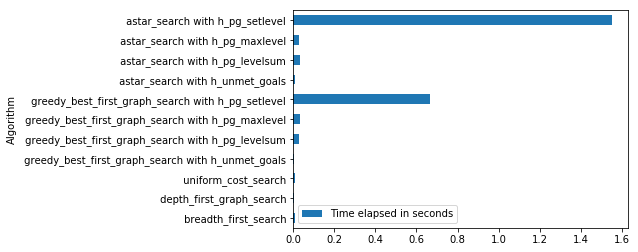

In [11]:
%matplotlib inline
p1.plot.barh(x='Algorithm', y='Time elapsed in seconds', rot=0)
#p1.describe()
#p1['Time elapsed in seconds'].astype(float)

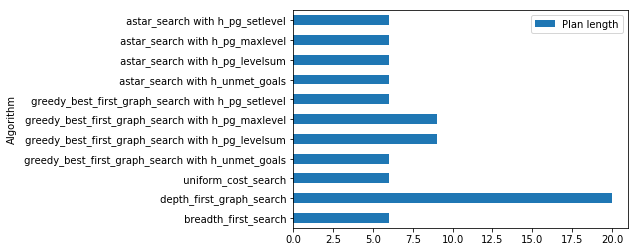

In [43]:
#p1.head()
#p1.loc['Plan length'] = p1.loc["Plan length"].apply(pd.to_numeric)
p1.plot.barh(x='Algorithm', y='Plan length', rot=0)

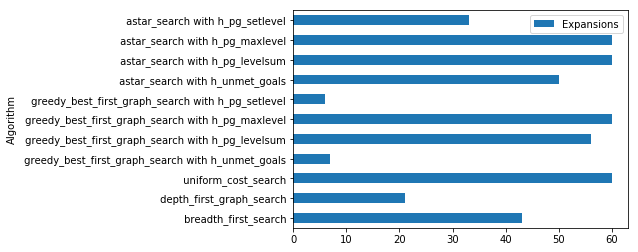

In [13]:
p1.plot.barh(x='Algorithm', y='Expansions', rot=0)

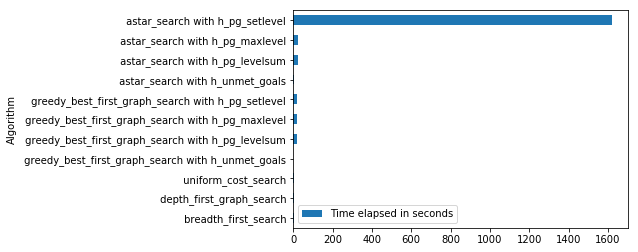

In [14]:
p2.plot.barh(x='Algorithm', y='Time elapsed in seconds', rot=0)

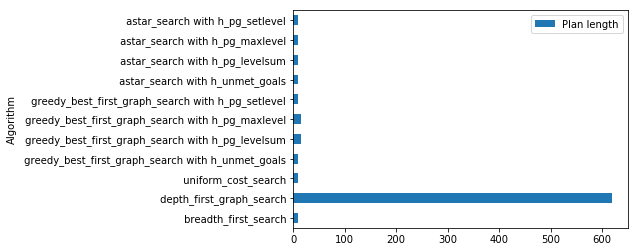

In [52]:
p2.plot.barh(x='Algorithm', y='Plan length', rot=0)

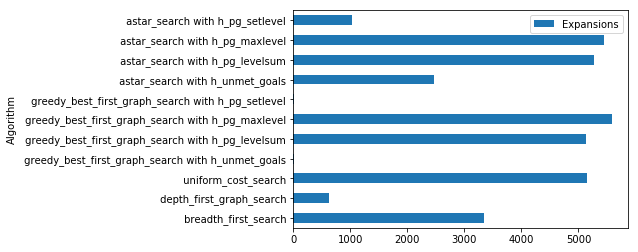

In [16]:
p2.plot.barh(x='Algorithm', y='Expansions', rot=0)

In [47]:
with open("searchResults34.txt", 'r') as f:
    data = f.readlines()
results34 = []
for line in data:
    if True: #'Solving' in line or 'Time elapsed in seconds' in line:
        results34.append(line.split(','))

In [48]:
df34 = result2df(results34)
df34.style.set_properties(subset=['Algorithm'], **{'width': '300px'})

,# Actions,Algorithm,Expansions,Goal Tests,New Nodes,Plan length,Problem,Time elapsed in seconds
0,88,breadth_first_search,14663,18098,129625,12,Problem 3,10.8742
1,104,breadth_first_search,99736,114953,944130,14,Problem 4,96.3507
2,88,greedy_best_first_graph_search with h_unmet_goals,25,27,230,15,Problem 3,0.0375156
3,104,greedy_best_first_graph_search with h_unmet_goals,29,31,280,18,Problem 4,0.0619304
4,88,greedy_best_first_graph_search with h_pg_setlevel,35,37,345,17,Problem 3,102.824
5,104,greedy_best_first_graph_search with h_pg_setlevel,107,109,1164,23,Problem 4,472.498
6,88,astar_search with h_unmet_goals,7388,7390,65711,12,Problem 3,8.69588
7,104,astar_search with h_unmet_goals,34330,34332,328509,14,Problem 4,57.2954
8,88,astar_search with h_pg_levelsum,18848,18850,164668,12,Problem 3,176.849
9,104,astar_search with h_pg_levelsum,114592,114594,1077277,14,Problem 4,1581.6


In [49]:
p3 = df34[df34['Problem'] == 'Problem 3']
p4 = df34[df34['Problem'] == 'Problem 4']

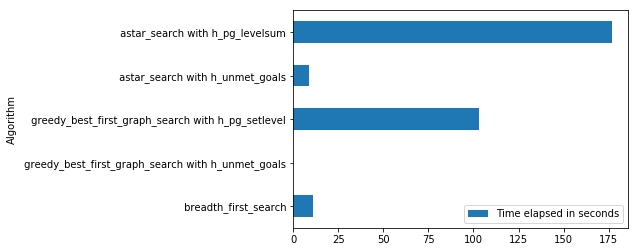

In [20]:
p3.plot.barh(x='Algorithm', y='Time elapsed in seconds', rot=0)

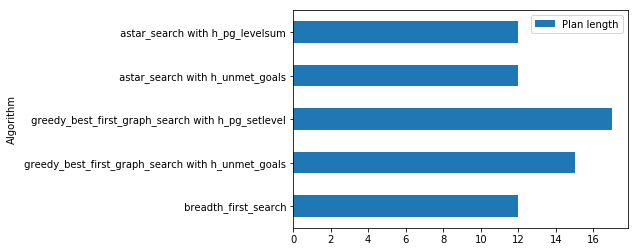

In [50]:
p3.plot.barh(x='Algorithm', y='Plan length', rot=0)

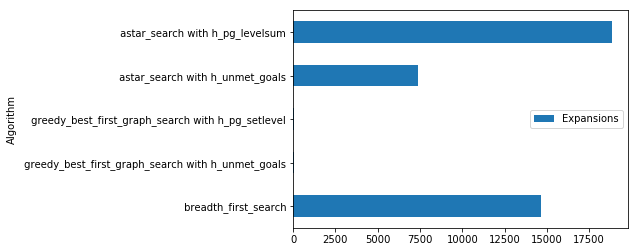

In [22]:
p3.plot.barh(x='Algorithm', y='Expansions', rot=0)

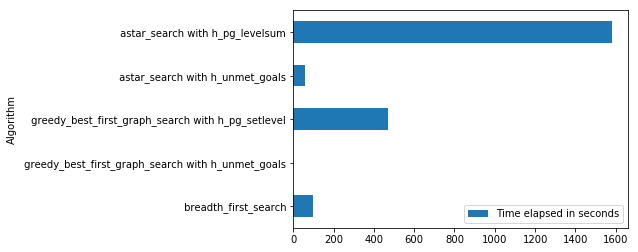

In [23]:
p4.plot.barh(x='Algorithm', y='Time elapsed in seconds', rot=0)

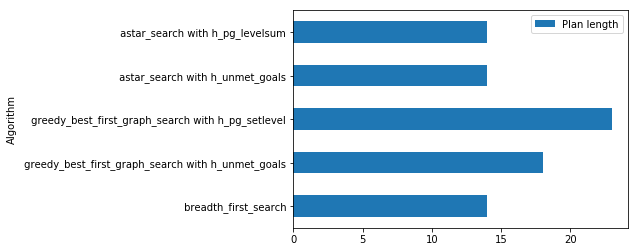

In [51]:
p4.plot.barh(x='Algorithm', y='Plan length', rot=0)

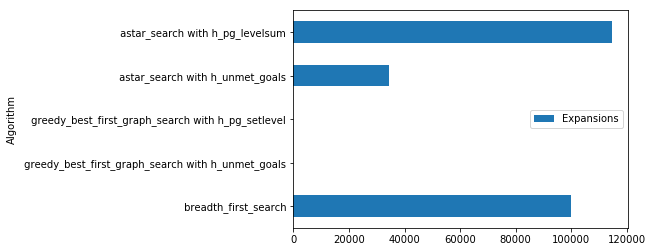

In [25]:
p4.plot.barh(x='Algorithm', y='Expansions', rot=0)